
<div class="alert alert-block alert-info"><font size="5"><center><b><u> S16_T02_v2: Tasca de web scraping
\begin{align*}Marc\:Breysse\end{align*}</div>

<span style=color:blue>Tasca de web scraping</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium..</span>

<span style=color:green><b> BeautifulSoup:</span>

<span style=color:green> We will capture in a table the current stock prices from Madrid StockExchange in real time.</span>

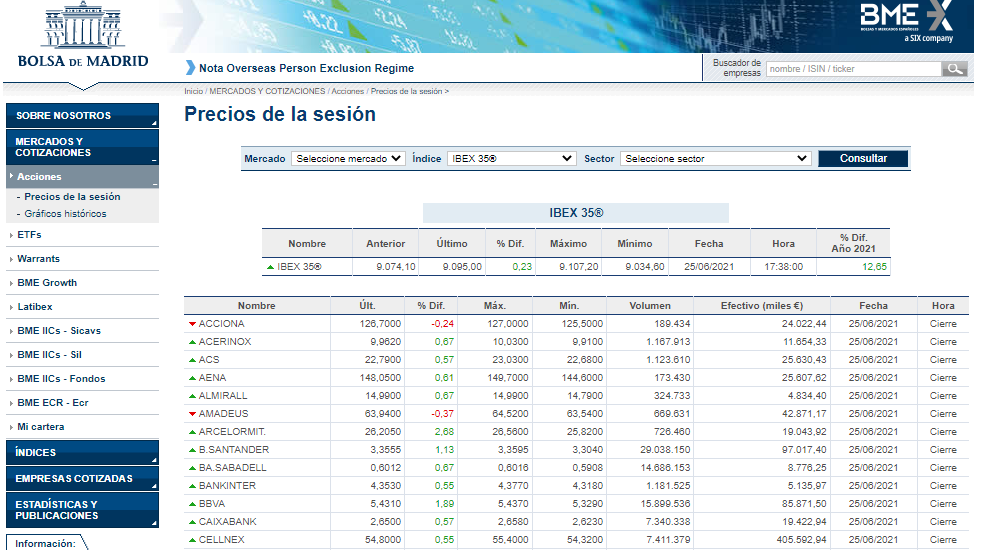

In [1]:
url='https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000&punto=indice'

In [2]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
from time import sleep

In [3]:
def get_table(round, url=url):
    round_url = f'{url}/{round}'
    page = requests.get(round_url)
    soup = BeautifulSoup(page.text, 'html.parser')

    rows = []
    for child in soup.find_all('table')[4].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)
    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

for round in range(1, 2):
    table = get_table(round)
    table.to_csv('MadridStockexchange_StocksQuotes_BS.csv', index=False)
    sleep(np.random.randint(1, 10))

In [4]:
pd = get_table(1, url)
pd

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"127,0000","-0,70","128,0000","125,2000",77.885,"9.847,41",30/06/2021,17:12:35
1,ACERINOX,"10,1700","-0,34","10,3000","10,0000",918.256,"9.321,31",30/06/2021,17:12:03
2,ACS,"22,5800","0,09","22,7400","22,2600",484.032,"10.905,90",30/06/2021,17:12:05
3,AENA,"137,7500","-0,72","141,0000","136,3000",86.499,"11.905,19",30/06/2021,17:12:08
4,ALMIRALL,"14,7100","-0,94","14,9700","14,7100",180.339,"2.680,19",30/06/2021,17:12:48
5,AMADEUS,"59,5600","0,98","59,9200","58,6800",489.643,"28.993,12",30/06/2021,17:11:52
6,ARCELORMIT.,"25,8600","-2,08","26,3750","25,5200",270.465,"7.013,75",30/06/2021,17:12:32
7,B.SANTANDER,"3,2265","-1,45","3,2650","3,2070",20.074.908,"64.943,57",30/06/2021,17:12:47
8,BA.SABADELL,"0,5706","-0,63","0,5774","0,5638",17.348.401,"9.887,20",30/06/2021,17:12:31
9,BANKINTER,"4,2240","-0,82","4,2750","4,2100",831.787,"3.521,44",30/06/2021,17:12:31


<span style=color:green><b>SELENIUM:</span>

<span style=color:green> Using Selenium, we will proceed to some automation (click) and also capture in a table the current stock prices from Madrid StockExchange in real time.</span>

In [5]:
import pandas as pd
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException

#from selenium.webdriver.chrome.options import Options
#options = Options()
#options.headless = True
#options.add_argument("--window-size=1920,1200")

In [6]:
# Use of Chrome driver
DRIVER_PATH = 'C:/Users/mio/Documents/IT ACADEMY/16. Machine learning avançat/Sprint16_T02_Web Scraping/chromedriver'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)

In [7]:
# Open url'Bolsa Madrid'
import time
driver.get('https://www.bolsamadrid.es')

# Automatic search of Shares page on Bolsa Madrid
links = driver.find_elements_by_link_text('Acciones')
links[0].click()

In [8]:
# Get the table of shares
table = driver.find_element_by_id('ctl00_Contenido_tblAcciones')

# Get the columns
columns=[]
for element in table.find_elements_by_tag_name("th"):    
    columns.append(element.text)
print(columns)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


In [9]:
# Get all values from table
results = []
for element in table.find_elements_by_tag_name("td"):
    results.append(element.text)

In [10]:
# Build a dataframe
data = {}
for i in range(9):
    data[columns[i]]=results[i::9]

df=pd.DataFrame(data)
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"127,0000","-0,70","128,0000","125,2000",78.126,"9.878,04",30/06/2021,17:12:55
1,ACERINOX,"10,1700","-0,34","10,3000","10,0000",918.706,"9.325,88",30/06/2021,17:13:07
2,ACS,"22,6200","0,27","22,7400","22,2600",485.705,"10.943,71",30/06/2021,17:13:09
3,AENA,"137,8000","-0,68","141,0000","136,3000",86.513,"11.907,12",30/06/2021,17:13:05
4,ALMIRALL,"14,7100","-0,94","14,9700","14,7100",180.339,"2.680,19",30/06/2021,17:12:48
5,AMADEUS,"59,5800","1,02","59,9200","58,6800",490.416,"29.039,17",30/06/2021,17:13:09
6,ARCELORMIT.,"25,8600","-2,08","26,3750","25,5200",270.563,"7.016,28",30/06/2021,17:13:00
7,B.SANTANDER,"3,2290","-1,37","3,2650","3,2070",20.090.559,"64.994,08",30/06/2021,17:13:07
8,BA.SABADELL,"0,5716","-0,45","0,5774","0,5638",17.361.728,"9.894,82",30/06/2021,17:13:18
9,BANKINTER,"4,2310","-0,66","4,2750","4,2100",832.632,"3.525,01",30/06/2021,17:13:18


In [11]:
# save csv file
df.to_csv('MadridStockexchange_StocksQuotes_SL.csv')

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.<span>

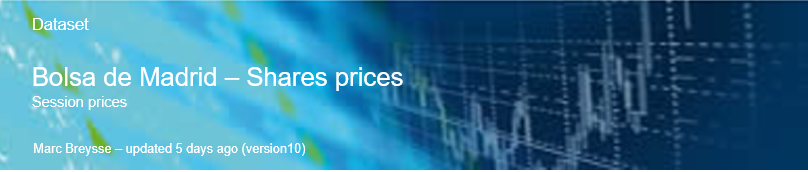

Title: Bolsa de Madrid - Shares prices

Sutitle: Session prices

Description: This dataset will gather all real time information regarding prices of Cie stock exchange

Licencia: Public Domain License

Codigo: https://github.com/MarcBreysse/BolsaMadrid_RealTimeSharesPrices

Dataset: MadridStockexchange_StocksQuotes.csv (csv generated in notebook code)

Representation

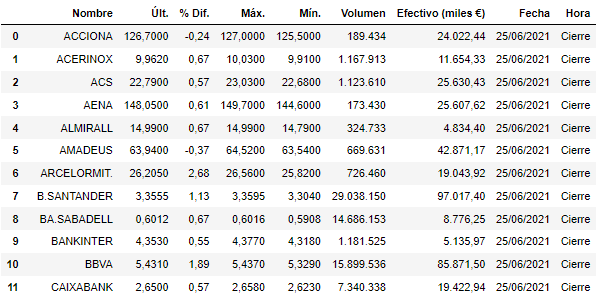

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy.<span>


In [12]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [13]:
import json

class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('resultados.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

In [14]:
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        #'https://www.brainyquote.com/topics/scrap-quotes',
        'http://quotes.toscrape.com/page/1/',
        'http://quotes.toscrape.com/page/2/',
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {
                'text': quote.css('span.text::text').extract_first(),
                'author': quote.css('span small::text').extract_first(),
                'tags': quote.css('div.tags a.tag::text').extract(),
            }

In [15]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()

2021-06-30 17:29:24 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-06-30 17:29:24 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2021-06-30 17:29:24 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-06-30 17:29:24 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2021-06-30 17:29:24 [py.warnings] WARNING: C:\Users\mio\anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:247: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



In [16]:
!type resultados.jl

{"text": "\u201cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\u201d", "author": "Albert Einstein", "tags": ["change", "deep-thoughts", "thinking", "world"]}
{"text": "\u201cIt is our choices, Harry, that show what we truly are, far more than our abilities.\u201d", "author": "J.K. Rowling", "tags": ["abilities", "choices"]}
{"text": "\u201cThere are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.\u201d", "author": "Albert Einstein", "tags": ["inspirational", "life", "live", "miracle", "miracles"]}
{"text": "\u201cThe person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.\u201d", "author": "Jane Austen", "tags": ["aliteracy", "books", "classic", "humor"]}
{"text": "\u201cImperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.\u201d", "author": "Marilyn M